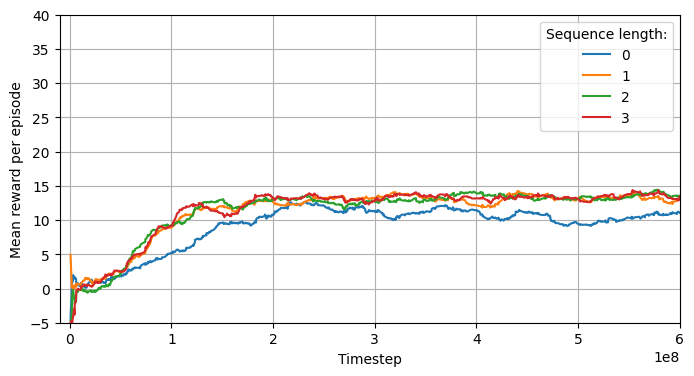

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np

df1 = pd.read_csv("Pong_seq_0.csv")
df2 = pd.read_csv("Pong_seq_1.csv")
df3 = pd.read_csv("Pong_seq_2.csv")
df4 = pd.read_csv("Pong_seq_3.csv")
# df2 = pd.read_csv("First_Soccer_Language/Team_2.csv")

# Add a column to differentiate between the files
df1['File'] = '0'
df2['File'] = '1'
df3['File'] = '2'
df4['File'] = '3'

# Concatenate the DataFrames
# df = df1
df = pd.concat([df1, df2, df3, df4])

# Apply a rolling window to smooth the data over 10 data points
window_size = 60
df['Rolling Min'] = df.groupby('File')['Value'].transform(lambda x: x.rolling(window=window_size, min_periods=1).min())
df['Rolling Max'] = df.groupby('File')['Value'].transform(lambda x: x.rolling(window=window_size, min_periods=1).max())
df['Smoothed Value'] = df.groupby('File')['Value'].transform(lambda x: x.rolling(window=window_size, min_periods=1).mean())

# Plotting using seaborn
plt.figure(figsize=(8, 4))
ax = plt.gca()
sns.lineplot(data=df, x='Step', y='Smoothed Value', hue='File', style='File', dashes=False)
 
plt.xlabel('Timestep')
plt.ylabel('Mean reward per episode')
plt.grid(True)
plt.legend(title='Sequence length:')
ax.set_xlim(-0.1e8, 6e8)
ax.set_ylim(-5, 40)

# Save fig as pdf
plt.savefig('multipong_reinforce_plot.pdf')